In [1]:
# Importing and loading data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
# Reading the Data

df = pd.read_csv('atomic_mass_abund.csv')
df

,Z,Name,Symbol,Mass of Atom (u),Abundance %,Jari-jari (A),Vmin,Vmax,Vrand,n,Emin,Emax,Erand,Unnamed: 13
0,1,Hydrogen,1H,1.007825,99.988500,0.403130,-8.074280e-19,-8.071080e-19,-8.072730e-19,1,-4.914123,-4.912123,-4.913153,NaN
1,1,Hydrogen,2H,2.014102,0.011500,0.805641,-1.613460e-18,-1.613140e-18,-1.613380e-18,1,-10.055723,-10.053723,-10.055277,NaN
2,1,Hydrogen,3H,3.016049,0.000000,1.206420,-2.416020e-18,-2.415700e-18,-2.415810e-18,1,-15.076544,-15.074544,-15.075289,NaN
3,2,Helium,3He,3.016029,0.000137,1.206412,-2.416000e-18,-2.415680e-18,-2.415860e-18,1,-15.076444,-15.074444,-15.075595,NaN
4,2,Helium,4He,4.002603,99.999863,1.601041,-3.206250e-18,-3.205920e-18,-3.206220e-18,1,-20.012004,-20.010004,-20.011845,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,111,Unununium,272Uuu,272.001535,0.000000,108.800614,-2.178730e-16,-2.178730e-16,-2.178730e-16,7,-1360.008675,-1360.006675,-1360.006964,NaN
317,112,Ununbium,277Uub,277.000000,0.000000,110.800000,-2.218770e-16,-2.218770e-16,-2.218770e-16,7,-1385.001000,-1384.999000,-1385.000601,NaN
318,114,Ununquadium,289Uuq,289.000000,0.000000,115.600000,-2.314890e-16,-2.314890e-16,-2.314890e-16,7,-1445.001000,-1444.999000,-1444.999246,NaN
319,116,Ununhexium,289Uuh,289.000000,0.000000,115.600000,-2.314890e-16,-2.314890e-16,-2.314890e-16,7,-1445.001000,-1444.999000,-1445.000786,NaN


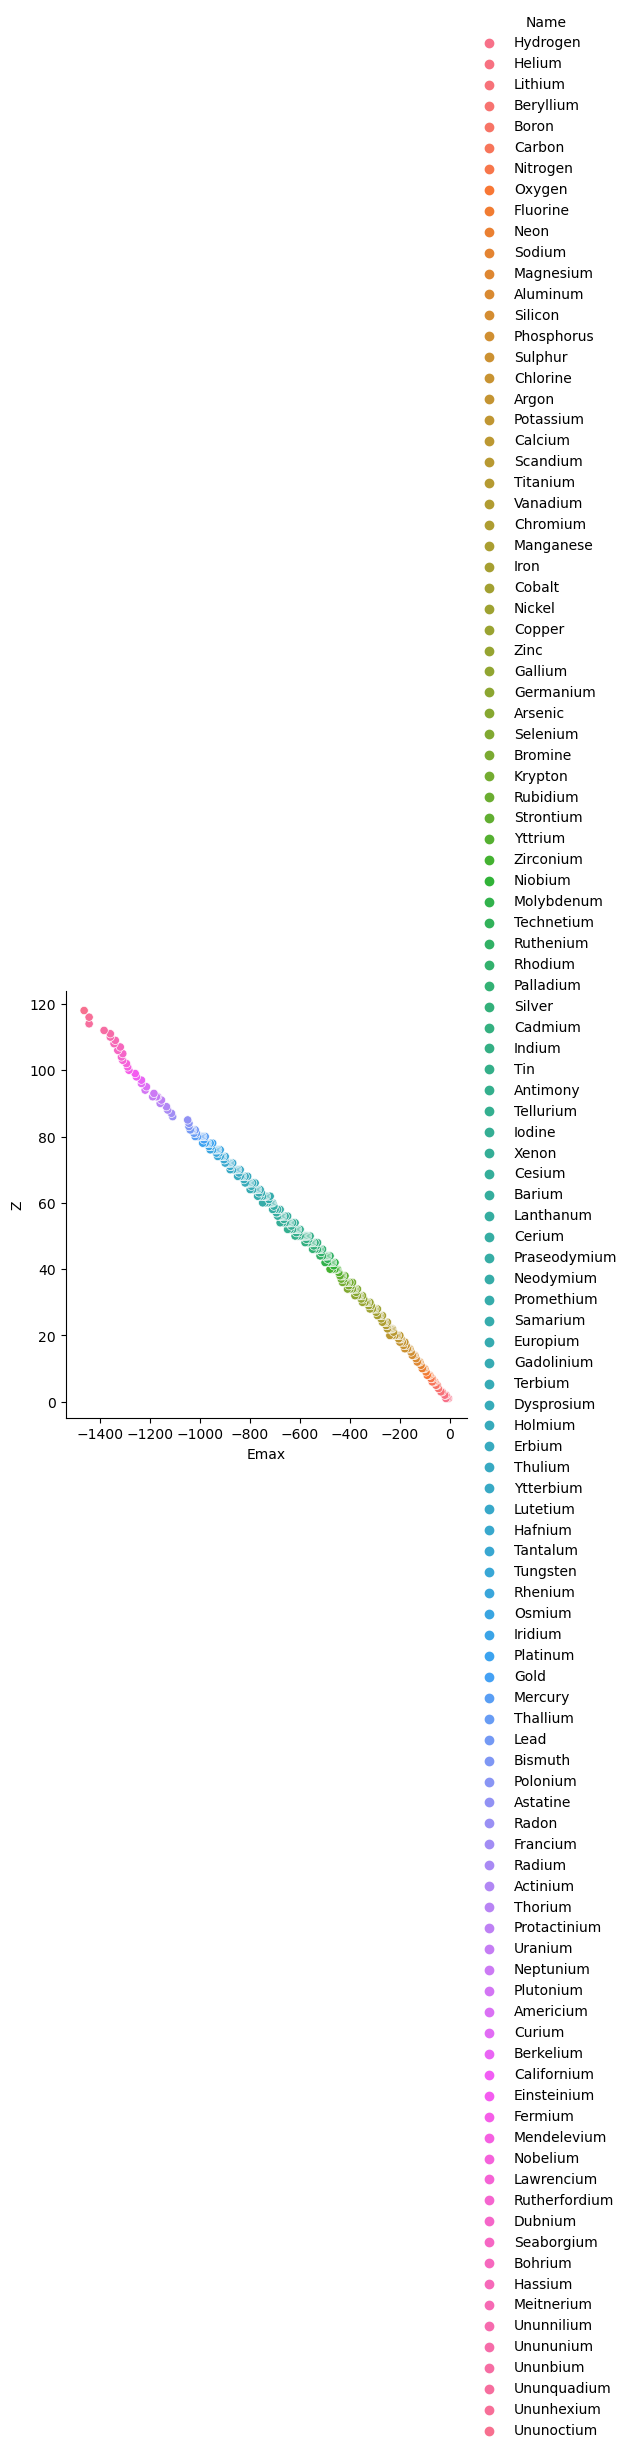

In [5]:
# Data Plotting

sns.relplot(y='Z', x='Emax', hue='Name', data = df)

In [3]:
# data prep for modelling
df_model = df.iloc[:, [12]].values
df_model

array([[   -4.91315342],
       [  -10.05527747],
       [  -15.07528861],
       [  -15.07559477],
       [  -20.01184492],
       [  -30.07291149],
       [  -35.07941122],
       [  -45.05993233],
       [  -50.0646246 ],
       [  -55.04653788],
       [  -59.99938779],
       [  -65.01624839],
       [  -70.0153926 ],
       [  -70.01455615],
       [  -75.00102943],
       [  -79.97410724],
       [  -84.99500019],
       [  -89.99544149],
       [  -94.99138539],
       [  -99.96302972],
       [ -104.9699902 ],
       [ -109.9570592 ],
       [ -114.9484054 ],
       [ -119.9260812 ],
       [ -124.9293108 ],
       [ -129.9132332 ],
       [ -134.9080401 ],
       [ -139.8836326 ],
       [ -144.8823685 ],
       [ -149.8689935 ],
       [ -154.8690738 ],
       [ -159.8605394 ],
       [ -164.8574064 ],
       [ -169.8384179 ],
       [ -179.8348566 ],
       [ -174.8433185 ],
       [ -184.8299709 ],
       [ -179.8376558 ],
       [ -189.8138555 ],
       [ -199.8127157 ],


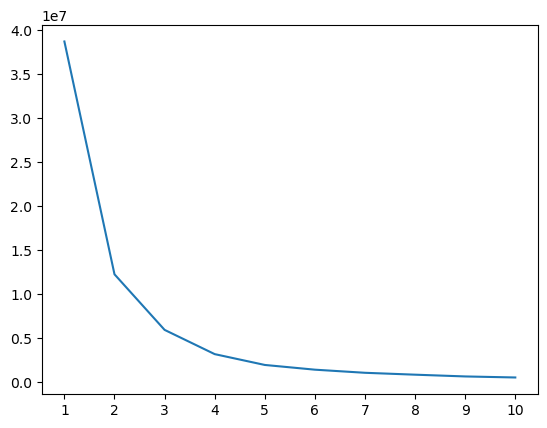

In [4]:
# Modelling algorithm with elbow method

wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_model)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11,1))
plt.show()

In [5]:
# Prediction model|
kmeans = KMeans(n_clusters = 190, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_preds = kmeans.fit_predict(df_model)
y_preds

array([105, 143,   4,   4,   4,  81, 156,  45, 150, 101, 101, 175,  15,
        15,  94,  94, 126, 186,  40,  40,  96,  96,  19,  19, 102, 102,
        64,  64,  41,  41,  98,  98,   7,   7,  80,  80, 139,  80, 139,
       111,  27, 111,  69, 111,  69, 119, 119, 124,  11,  54, 124,  11,
        11,  68,  68,  68, 131,  68, 131,  39, 125,  73, 125,  73, 129,
       129,  24, 129,  24,  95,  95,   1,   1, 147,   1, 147,  52,  52,
        86,  86,  33,  86,  33,  79,  79, 135, 135,  79, 135,  18, 122,
        43,  90,  43,  90, 122,  43,  90,  63,  63,  34,  34,  97,  63,
        34,  97,  97,   8,   8, 189, 116, 141,  66,  42, 116, 141, 159,
        66,  66,  23, 109,  23,  66,  23, 165, 109,  62,  99,  14,  14,
        99,  14, 157,  87,  36,  65,  87, 177,  87,  36,  65, 127, 127,
        93,  21,  83,  93, 107, 127,  21, 107,  83, 148, 148,   3, 128,
       113,  28,  82, 106, 128, 113, 106,  28, 188,  91,  38,  71,  38,
        28,  91,  38, 137,  71, 180, 121, 117,  51,  10,  71, 12

In [25]:
### Prediction Output

def predict(x):
        ClusterB = ["H", "He", 'Li', 'Be', 'B','C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', "Xe", "Cs", 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',"Ho",'Er', 'Tm', "Yb", "Lu", "Hf", "Ta", "W", "Re", 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', "Pb", "Bi", "Po", "At", "Rn", "Fr", "Ra", "Ac", "Th", "Pa", "U", "Np", "Pu", "Am", "Cm", "Bk", "Cf", 'Es', "Fm", "Md", "No", "Lr", "Rf","Db", "Sg", "Bh", "Hs", 'Mt', 'Uun', 'Uuu', 'Uub', 'Uuq', 'Uuh', 'Uuo']
        Prediction = kmeans.predict([[x]])
        ClusterB[np.squeeze(Prediction)]
    
        return np.squeeze(Prediction)
    
energi = float(input())
energipredict = -energi * 10000 # diubah karena satuan yang ditanyakan tidak diketahui

predict(energipredict)

0.0181


array(80)